Does not work in fish
- conda create -n py35 python=3.5
- source activate py35
- conda install notebook ipykernel
- ipython kernel install --user

In [33]:
import random
import names

import tkinter as tk
from tkinter import ttk

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("TkAgg")
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg
from matplotlib.figure import Figure
import matplotlib.animation as animation
from matplotlib import style
%matplotlib inline 


LARGE_FONT = ("Verdana", 12)
style.use("ggplot")

/home/efelnic/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [34]:
class Predictor(object):
    """
    The predictor attemps to guess what the generator will produce.
    He gains a point if he predicts accurately and looses one if he doesn't
    """
    def __init__(self):
        self.name = names.get_full_name()
        self.rules = []
        self.gameScore = 0
        self.lastScore = 0
        self.scores = []
        self.sequence = ''
        # make players start with some rules
    
    def getRules(self, ruleset):
        for i in range(0, random.randint(5,10)):
            key = random.choice(list(ruleset.keys()))
            newrule = random.choice(ruleset[key])
            self.rules.append(newrule)
            
        self.rules = sorted(self.rules, key = lambda x : len(x))
        
    def predict(self, generator):
        
        def arequivalent(s, r):
            for i in range(0, len(s)):
                if s[i] != r[i] and r[i] != 'X':
                    return False
            return True
        
        
        gsequence = generator.sequence
        slength = len(gsequence)
        
        for rule in self.rules:
            rlength = len(rule[0])
            if slength >= rlength:
                seqchunk = gsequence[-rlength:]
                if arequivalent(seqchunk, rule[0]):
                    predicted = rule[1]
                    #print seqchunk, rule[0]
                    self.sequence += predicted
                    return predicted
        randpred = str(random.randint(0,1))
        self.sequence += randpred
        #print "randomlypredicted"
        return randpred
    
    
    
    def predictorWins(self):
        self.gameScore += 1
        
    def newGame(self):
        self.sequence = ''
        self.scores.append(self.gameScore)
        self.lastScore = self.gameScore
        self.gameScore = 0
        
    def mutate(self, ruleset):
        key = random.choice(list(ruleset.keys()))
        newrule = random.choice(ruleset[key])
        self.rules.append(newrule)
        
        del self.rules[random.randint(0,len(self.rules) - 1)]
        
        self.rules = sorted(self.rules, key = lambda x : len(x))
        
        
    def crossover(self, secondParent):
        newgen = Predictor()
        newruleset = self.rules + secondParent.rules
        newruleset = newruleset[1::2]
        newgen.rules = newruleset
        return newgen
        
                
        
    
    
def createAllPreRules(length):
    
    L = ['']
    for n in range(length):
        tmp = []
        for el in L:
            if random.random() < 0.9:
                tmp.append(el+'0')
            else:
                tmp.append(el+'X')

            if random.random() < 0.9:
                tmp.append(el+'1')
            else:
                tmp.append(el+'X')
            tmp.append('')
        L = tmp
    L = sorted(set(L))
    
    formRules = {}
    
    for i in range(length+1):
        formRules[str(i)] = []
        
    for i in L:
        formRules[str(len(i))].append((i, '1'))
        formRules[str(len(i))].append((i, '0'))
    
    formRules.pop('0', None)
    return formRules

possiblePreRules = createAllPreRules(10)

In [35]:
class Generator(object):
    """
    The generator generates a string of 1's and 0's.
    If the predictor has accurately predicted his next element he looses a point, and if not he gains one
    """
    possibleRules = []
    
    def __init__(self):
        self.name = names.get_full_name()
        self.rules = []
        self.sequence = ''
        self.gameScore = 0
        self.lastScore = 0
        self.scores = []
        
    def generate(self):
        slength = len(self.sequence)
        for rule in self.rules:
            rlength = len(rule[0])
            if slength >= rlength:
                seqchunk = self.sequence[-rlength:]
                if seqchunk == rule[0]:
                    generated = rule[1]
                    self.sequence += generated
                    return generated
        randgen = str(random.randint(0,1))
        self.sequence += randgen
        #print "randomlygenerate"
        return randgen
        
    def getRules(self, ruleset):
        for i in range(0, random.randint(5,10)):
            key = random.choice(list(ruleset.keys()))
            newrule = random.choice(ruleset[key])
            self.rules.append(newrule)
        self.rules = sorted(self.rules, key = lambda x: len(x))
        #print self.rules
        
    def generatorWins(self):
        self.gameScore += 1
        
    def newGame(self):
        self.scores.append(self.gameScore)
        self.lastScore = self.gameScore
        self.gameScore = 0
        self.sequence = ''
        
    def mutate(self, ruleset):
        key = random.choice(list(ruleset.keys()))
        newrule = random.choice(ruleset[key])
        self.rules.append(newrule)
        
        del self.rules[random.randint(0,len(self.rules) -1)]
        
        self.rules = sorted(self.rules, key = lambda x: len(x))
        
    def crossover(self, secondParent):
        newgen = Generator()
        newruleset = self.rules + secondParent.rules
        newruleset = newruleset[1::2]
        newgen.rules = newruleset
        return newgen
        
            
def createAllGenRules(length):
    
    L = [""]
    for n in range(length):
        tmp = []
        for el in L:
            tmp.append(el+'0')
            tmp.append(el+'1')
            tmp.append('')
        L = tmp
        
    L = sorted(set(L))
    
    formRules = {}
    
    for i in range(length+1):
        formRules[str(i)] = []
        
    for i in L:
        formRules[str(len(i))].append((i, '1'))
        formRules[str(len(i))].append((i, '0'))
        
    formRules.pop('0', None)
    return formRules

possibleGenRules = createAllGenRules(10)

In [44]:
def playGame(numberOfPlayers, numOfGenerations, alpha = 0.7):
    
    
    def fitness(player):
        return player.gameScore*alpha + player.lastScore*(1-alpha)
    
    
    predictionTeam = []
    generationTeam = []
    
    genchampfitness = []
    prechampfitness = []
    
    genAvgfitness = []
    preAvgfitness = []
    
    for i in range(numberOfPlayers):
        newPred = Predictor()
        newPred.getRules(possiblePreRules)
        newGen = Generator()
        newGen.getRules(possibleGenRules)
        predictionTeam.append(newPred)
        generationTeam.append(newGen)
    PreChamp = random.choice(predictionTeam)
    GenChamp = random.choice(generationTeam)
    
    for generation in range(0, numOfGenerations):
        
        
        for move in range(0,100):
            
            championGeneration = GenChamp.generate()            
            championPrediction = PreChamp.predict(GenChamp)
            
            for predPlayer in predictionTeam:
                playerPrediction = predPlayer.predict(GenChamp)
                if playerPrediction == championGeneration:
                    predPlayer.gameScore += 1
                    
            for genPlayer in generationTeam:
                playerGeneration = genPlayer.generate()
                if playerGeneration != championPrediction:
                    genPlayer.gameScore += 1
                    
                        

        predictionTeam = sorted(predictionTeam, key=lambda player: fitness(player) , reverse = True)
        generationTeam = sorted(generationTeam, key=lambda player: fitness(player) , reverse = True)
        
        
        
        PreChamp = predictionTeam[0]
        GenChamp = generationTeam[0]

        for i in range(0, len(predictionTeam)//2):
            predictionTeam[i].mutate(possiblePreRules)
            generationTeam[i].mutate(possibleGenRules)

            
        
        for i in range(int(numberOfPlayers//2), numberOfPlayers):
            predictionTeam[i] = random.choice(predictionTeam).crossover(random.choice(predictionTeam))
            generationTeam[i] = random.choice(generationTeam).crossover(random.choice(generationTeam))

        #print "Predictor champion fitness : " + str(fitness(PreChamp))
        #print "Generator champion fitness : " + str(fitness(GenChamp))
        genchampfitness.append(fitness(GenChamp))
        prechampfitness.append(fitness(PreChamp))
        
        genAvgfitness.append(sum(fitness(player) for player in generationTeam)/len(generationTeam))
        preAvgfitness.append(sum(fitness(player) for player in predictionTeam)/len(predictionTeam))
        
        #for i in predictionTeam:
        #    print "GS : " + str(i.gameScore) + "    " + "LS : " + str(i.lastScore)
        #for i in generationTeam:
        #    print "GS : " + str(i.gameScore) + "    " + "LS : " + str(i.lastScore)
        
        
        #print len(PreChamp.sequence), len(GenChamp.sequence)
        
        
        PreChamp.newGame()
        GenChamp.newGame()
        for i in generationTeam:
            i.newGame()
        for i in predictionTeam:
            i.newGame()
            
        
    
        
    f = plt.figure(figsize=(5,5), dpi = 100)
    a = f.add_subplot(111)
    a.plot(genchampfitness, label='Generator Champ Fitness')
    a.plot(prechampfitness, label='Predictor Champ Fitness')
    a.plot(genAvgfitness, label='Generator Average Fitness')
    a.plot(preAvgfitness, label='Predictor Average Fitness')
    
    f.show()
    
#     plt.plot(genchampfitness, label='Generator Champ Fitness')
#     plt.plot(prechampfitness, label='Predictor Champ Fitness')
#     plt.plot(genAvgfitness, label='Generator Average Fitness')
#     plt.plot(preAvgfitness, label='Predictor Average Fitness')    
#     plt.ylabel('Fitness')    
#     plt.xlabel('Generation')
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.show()

/home/efelnic/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


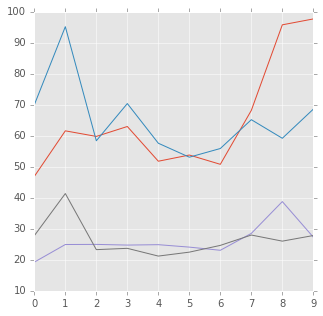

In [45]:
playGame(10,10)

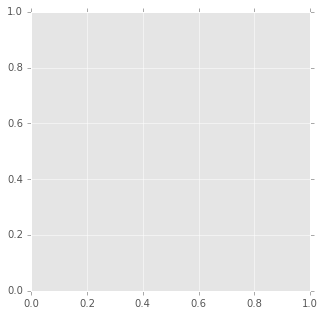

In [72]:
f = plt.figure(figsize=(5,5), dpi = 100)
a = f.add_subplot(111)

class SeaofBTCapp(tk.Tk):

    def __init__(self, *args, **kwargs):
        
        tk.Tk.__init__(self, *args, **kwargs)
        
        tk.Tk.wm_title(self, "Simulator")
        
        container = tk.Frame(self)
        container.pack(side="top", fill="both", expand = True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}

        for F in (StartPage, GraphPage):

            frame = F(container, self)

            self.frames[F] = frame

            frame.grid(row=0, column=0, sticky="nsew")

        self.show_frame(StartPage)

    def show_frame(self, cont):

        frame = self.frames[cont]
        frame.tkraise()
        
class StartPage(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self,parent)
        label = tk.Label(self, text="Start Page", font=LARGE_FONT)
        label.pack(pady=10,padx=10)

        button = ttk.Button(self, text="Visit Graph Page",
                            command=lambda: controller.show_frame(GraphPage))
        button.pack()
        
class GraphPage(tk.Frame):

    def __init__(self, parent, controller):
        
        def playGame(numberOfPlayers, numOfGenerations, alpha = 0.7):
    
    
            def fitness(player):
                return player.gameScore*alpha + player.lastScore*(1-alpha)


            predictionTeam = []
            generationTeam = []

            genchampfitness = []
            prechampfitness = []

            genAvgfitness = []
            preAvgfitness = []

            for i in range(numberOfPlayers):
                newPred = Predictor()
                newPred.getRules(possiblePreRules)
                newGen = Generator()
                newGen.getRules(possibleGenRules)
                predictionTeam.append(newPred)
                generationTeam.append(newGen)
            PreChamp = random.choice(predictionTeam)
            GenChamp = random.choice(generationTeam)

            for generation in range(0, numOfGenerations):


                for move in range(0,100):

                    championGeneration = GenChamp.generate()            
                    championPrediction = PreChamp.predict(GenChamp)

                    for predPlayer in predictionTeam:
                        playerPrediction = predPlayer.predict(GenChamp)
                        if playerPrediction == championGeneration:
                            predPlayer.gameScore += 1

                    for genPlayer in generationTeam:
                        playerGeneration = genPlayer.generate()
                        if playerGeneration != championPrediction:
                            genPlayer.gameScore += 1



                predictionTeam = sorted(predictionTeam, key=lambda player: fitness(player) , reverse = True)
                generationTeam = sorted(generationTeam, key=lambda player: fitness(player) , reverse = True)



                PreChamp = predictionTeam[0]
                GenChamp = generationTeam[0]

                for i in range(0, len(predictionTeam)//2):
                    predictionTeam[i].mutate(possiblePreRules)
                    generationTeam[i].mutate(possibleGenRules)



                for i in range(int(numberOfPlayers//2), numberOfPlayers):
                    predictionTeam[i] = random.choice(predictionTeam).crossover(random.choice(predictionTeam))
                    generationTeam[i] = random.choice(generationTeam).crossover(random.choice(generationTeam))
                    
                genchampfitness.append(fitness(GenChamp))
                prechampfitness.append(fitness(PreChamp))

                genAvgfitness.append(sum(fitness(player) for player in generationTeam)/len(generationTeam))
                preAvgfitness.append(sum(fitness(player) for player in predictionTeam)/len(predictionTeam))


                PreChamp.newGame()
                GenChamp.newGame()
                for i in generationTeam:
                    i.newGame()
                for i in predictionTeam:
                    i.newGame()




            
            a.clear()
            a.plot(genchampfitness, label='Generator Champ Fitness')
            a.plot(prechampfitness, label='Predictor Champ Fitness')
            a.plot(genAvgfitness, label='Generator Average Fitness')
            a.plot(preAvgfitness, label='Predictor Average Fitness')
            canvas.show()

            #f.show()
            
            
            
            
        tk.Frame.__init__(self, parent)
        label = tk.Label(self, text="Graph Page", font=LARGE_FONT)
        label.pack(pady=10,padx=10)            

        button1 = ttk.Button(self, text="Back to Home",
                            command=lambda: controller.show_frame(StartPage))
        button1.pack()
        
        instruction1 = ttk.Label(self, text="Enter program number of players : ")
        instruction1.pack(pady=10,padx=10)
        
        numPlayerEntry = ttk.Entry(self)
        numPlayerEntry.pack(pady=10,padx=10)
        
        instruction2 = ttk.Label(self, text="Enter program number of generations : ")
        instruction2.pack(pady=10,padx=10)
        
        numGenerationEntry = ttk.Entry(self)
        numGenerationEntry.pack(pady=10,padx=10)
        
        submit_button = ttk.Button(self, text = "Submit", command=lambda: playGame(int(numPlayerEntry.get()),
                                                                                 int(numGenerationEntry.get())))
        submit_button.pack(pady=10,padx=10)
        
        canvas = FigureCanvasTkAgg(f, self)
        canvas.show()
        canvas.get_tk_widget().pack(side = tk.TOP, fill = tk.BOTH, expand = True)

        toolbar = NavigationToolbar2TkAgg(canvas, self)
        toolbar.update()
        toolbar.pack()
        
        

In [73]:
app = SeaofBTCapp()
app.mainloop()